**Seattle Airbnb Data Analysis**

As part of the Udacity data science nanodegree course, I have to analyse the Airbnb Seattle dataset for 2016 following the CRISP-DM process.

1. Business Understanding:
Some of the questions I am anwering over here:

1. Which listings are charging the highest price?
2. What is the average monthly price charged?
3. How much time does the host take to respond?
4. Which are the popular neighbourhoods?
5. Which are the most expensive and cheapest neighbourhoods in Seattle?
6. What review ratings affect the customer?
7. Does avaialbility of certain amenities fetch a higher price?

**Data Understanding**:

Collecting, wrangling and exploring the data

In [4]:
###importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from zipfile import ZipFile
%matplotlib inline

In [5]:
#extracting the zipfile
with ZipFile('seattle_new.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [6]:
###Read the files

df_cal=pd.read_csv('calendar.csv')
df_listing=pd.read_csv('listings.csv')

In [7]:
###looking at the datasets

df_cal.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
###looking at the datasets

df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


**Exploring the Calendar dataset**

1. Identify # of rows and columns
2. Missing values
3. Describe the variables in the dataset and look at the datatypes
4. Data Wrangling:
    a. Clean/convert Price from String to Float
    b. Extract Month from the dates

In [9]:
###Exploring the calendar dataset

###Number of rows and columns
print('Number of rows and columns:',df_cal.shape)
print()

###Number of missing values for price
print('Percentage of Missing values:',(df_cal.isnull().sum()/len(df_cal))*100)
print()

###Describe
print(df_cal.describe(include='all'))

Number of rows and columns: (1393570, 4)

Percentage of Missing values: listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-08-28         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


In [10]:
###Datatypes for calendar dataset

df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
#######Cleaning up Price variable
#Can't convert directly to int since it has string values
#first convert to str and remove the dollar sign and the comma, then convert to float

df_cal["price"]=df_cal["price"].str.replace(',','')
df_cal["price"]=df_cal["price"].str.replace('$','')

df_cal["price"]=df_cal["price"].astype(float)

In [12]:
### remove the missing price values, so convert to 0
###since that would still mean price is unavaialble or not displayed and wont affect the data set
df_cal["price"].fillna(0, inplace=True)
df_cal["price"].head()

0    85.0
1    85.0
2     0.0
3     0.0
4     0.0
Name: price, dtype: float64

In [13]:
###Looking at the Date range available in the dataset
print(" Date range for the listings: ",df_cal['date'].min(),"to ", df_cal['date'].max())

 Date range for the listings:  2016-01-04 to  2017-01-02


In [14]:
#####Extracting Month from the dates

##converting date to datetime to extract  month  later
df_cal['date_column'] = pd.to_datetime(df_cal['date'])
##creating a Month column from the date column
df_cal['Month']=df_cal['date_column'].dt.month
df_cal['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

**Exploring price**

In [15]:
###total sum of all prices charged
total_earned=np.sum(df_cal["price"])
print("Sum of all prices charged through the year: $",total_earned)

Sum of all prices charged through the year: $ 128915264.0


In [16]:
####sum of prices charged per month
monthly_bookings=df_cal.groupby('Month')['price'].count()
print(monthly_bookings)

Month
1     114540
2     110722
3     118358
4     114540
5     118358
6     114540
7     118358
8     118358
9     114540
10    118358
11    114540
12    118358
Name: price, dtype: int64


In [17]:
###average price charged per listing for the year
avg_price=total_earned/df_cal['listing_id'].nunique()  
print("Average earning per listing: $",round(avg_price,0))

Average earning per listing: $ 33765.0


In [18]:
###Average price charged per listing 
print("Average price charged per listing: $", round(df_cal['price'].mean(),0))

Average price charged per listing: $ 93.0


In [19]:
## Average price charged per listing
mean_price_listing=df_cal.groupby('listing_id')['price'].mean()
mean_price_listing

listing_id
3335        101.589041
4291         82.000000
5682         45.668493
6606         92.849315
7369         12.342466
9419         85.616438
9460         17.761644
9531         83.589041
9534         89.726027
9596        120.739726
10385        60.000000
10695       109.000000
11012       312.849315
11411        60.000000
13068       391.109589
14386        34.630137
15108        50.301370
17951        79.723288
19611        64.052055
19619        74.616438
19623       107.246575
20868       134.372603
20927        85.175342
20928        76.975342
23192       107.616438
23356       199.123288
23430        74.739726
23919       143.301370
24212       103.706849
25002        65.890411
               ...    
10234558     53.610959
10235014      2.054795
10235136      0.136986
10247453    158.013699
10248139      1.972603
10249527      0.747945
10250735      0.821918
10252110     18.082192
10262971     70.000000
10265391     69.424658
10267360     21.189041
10272763     68.000000


In [20]:
##Average price charged for the top 10 listings
print("Avg price for Top 10 most expensive listings: $",round(mean_price_listing.nlargest(10).mean(),0))

Avg price for Top 10 most expensive listings: $ 814.0


In [21]:
###Listing avaialble through most of the year
listing_avlb=(df_cal.groupby('available')['listing_id'].count()/df_cal.shape[0])*100
print("Listings % avaialbility through the year:", round(listing_avlb,0))

Listings % avaialbility through the year: available
f    33.0
t    67.0
Name: listing_id, dtype: float64


In [22]:
###Average Price charged per month
df_cal.groupby('Month')['price'].mean()

Month
1      69.683499
2      82.308439
3      91.233047
4      89.683700
5      94.281823
6      99.453597
7      95.377854
8      97.181255
9      96.612092
10     95.444659
11     96.879911
12    100.958803
Name: price, dtype: float64

Text(0, 0.5, 'Average Price')

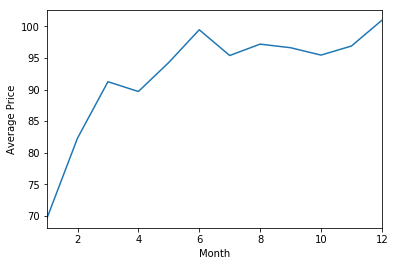

In [23]:
month_price=df_cal.groupby('Month')['price'].mean().plot()
plt.ylabel('Average Price')

**Exploring the Listing dataset**
1. Identify # of rows and columns
2. Missing values
3. Describe the variables in the dataset and look at the datatypes
4. Data Wrangling: Clean/convert Price from String to Float
5. Identify all the categorical and quantitative variables
6. Observing the average price charged per neighbourhood
7. Ratings and amenities correlation

In [24]:
###For the listings dataset

##Number of rows and columns
print('Number of rows and columns:',df_listing.shape)
print()

###Number of missing values
print('Percentage of Missing values:',(df_listing.isnull().sum()/len(df_listing))*100)
print()

##Describe
print(df_listing.describe(include='all'))

Number of rows and columns: (3818, 92)

Percentage of Missing values: id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               4.635935
space                                14.903091
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                27.029859
notes                                42.063908
transit                              24.463070
thumbnail_url                         8.381351
medium_url                            8.381351
picture_url                           0.000000
xl_picture_url                        8.381351
host_id                               0.000000
host_url                              0.000000
host_name                             0.052383
host_since                           

In [25]:
###Cleaning the price variable and converting to float
df_listing["price"]=df_listing["price"].str.replace('$','')
df_listing["price"]=df_listing["price"].str.replace(',','')

df_listing["price"]=df_listing["price"].astype(float)

In [26]:
### identify all the categorical variables
df_listing.select_dtypes(include="object").columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [27]:
### identify all the quantitative variables
df_listing.select_dtypes(include=("float64","int64")).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [28]:
##Host response time
df_listing['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

Text(0.5, 0, 'Neighbourhoods')

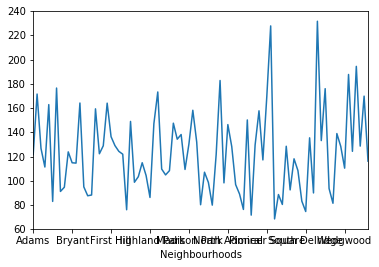

In [29]:
###Average price per neighbourhood
neighbourhood_price=df_listing.groupby('neighbourhood_cleansed')['price'].mean().plot()
plt.xlabel('Neighbourhoods')

In [30]:
###create a dataframe with ratings scores
df_reviews=df_listing[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','price']]

###Correlation matrix
corr_ratings=df_reviews.corr()
corr_ratings

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
review_scores_rating,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.055551
review_scores_accuracy,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878,0.019026
review_scores_cleanliness,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354,0.054357
review_scores_checkin,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263,0.007877
review_scores_communication,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772,0.012990
review_scores_location,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252,0.075069
review_scores_value,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000,-0.041776
price,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,1.000000


In [31]:
###create a dataframe with amenities listed
df_amenities=df_listing[['bathrooms', 'bedrooms', 'beds','guests_included',
       'minimum_nights', 'maximum_nights','price']]

###Correlation matrix
corr_amen=df_amenities.corr()
corr_amen

,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,price
bathrooms,1.000000,0.610937,0.532838,0.304780,0.006358,-0.015322,0.516424
bedrooms,0.610937,1.000000,0.753167,0.457009,0.011957,-0.008591,0.627720
beds,0.532838,0.753167,1.000000,0.460512,0.002670,-0.009114,0.589525
guests_included,0.304780,0.457009,0.460512,1.000000,-0.001659,-0.018637,0.392875
minimum_nights,0.006358,0.011957,0.002670,-0.001659,1.000000,0.003161,0.017297
maximum_nights,-0.015322,-0.008591,-0.009114,-0.018637,0.003161,1.000000,-0.003336
price,0.516424,0.627720,0.589525,0.392875,0.017297,-0.003336,1.000000


**Analyzing the data**

1. Which listings are charging the highest price?

Text(0.5, 1.0, 'Top 10 listings charging the highest price')

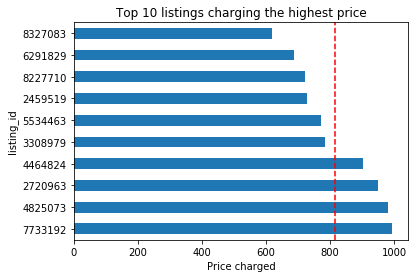

In [32]:
###Highest price charged listings
mean_price_listing=df_cal.groupby('listing_id')['price'].mean()
mean_price_listing.nlargest(10).plot(kind="barh");
plt.xlabel('Price charged')
plt.axvline(mean_price_listing.nlargest(10).mean(),color='r',linestyle='--')##average price for top 10= $814
plt.title("Top 10 listings charging the highest price")

2. What is the average price charged per month?

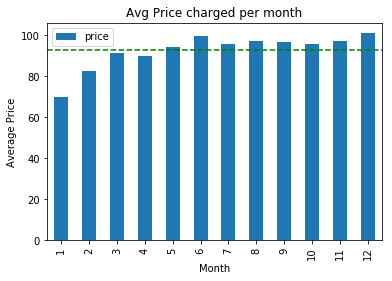

In [33]:
###The months with highest price
mth_price_listing=df_cal.groupby('Month')['price'].mean()
mth_price_listing.plot(kind="bar");
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title("Avg Price charged per month")
plt.axhline(mth_price_listing.mean(),color='g',linestyle='--')##average price for 2016= $92
plt.legend()

Observation:
June and december are the peak price months. These months are the summer and christmas vacation times of the year and the data reflects that during vacation time, the prices tend to peak. While in Q1 2016, price charged was lower than the average for the whole year.

3. How much time does the host take to respond?

Text(0.5, 1.0, 'Response Time')

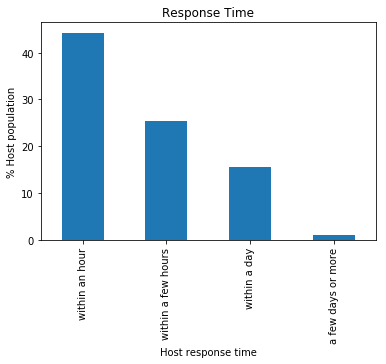

In [34]:
###Host response time

resp_time=df_listing['host_response_time'].value_counts()
((resp_time/df_listing.shape[0])*100).plot(kind="bar");
plt.xlabel('Host response time')
plt.ylabel('% Host population')
plt.title("Response Time")

Observation:
c45% of the hosts respond within an hour

4. Which are the popular neighbourhoods?

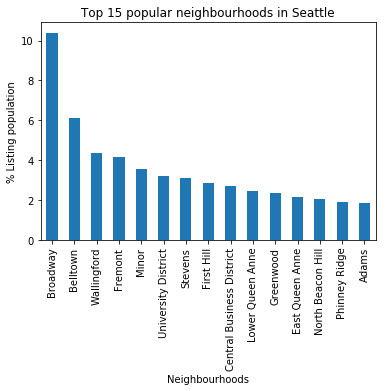

In [35]:
###identifying the top 15 popular neighbour hoods
loca=df_listing['neighbourhood_cleansed'].value_counts()

((loca[0:15]/df_listing.shape[0])*100).plot(kind="bar");
plt.ylabel('% Listing population')
plt.xlabel('Neighbourhoods')
plt.title("Top 15 popular neighbourhoods in Seattle");

Observation:
20% of the properties are located in Broadway, Belltown and Wallingford.

5. Which are the most expensive and cheapest neighbourhoods in Seattle?
1. Most Expensive neighbourhoods in Seattle

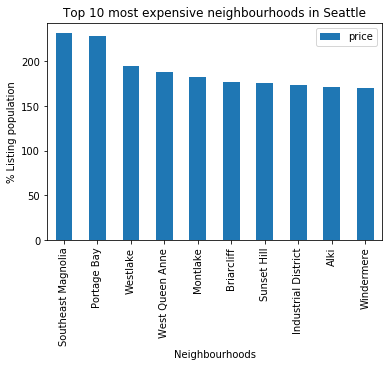

In [36]:
###10 most expensive neighbourhoods
top10_n = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values("price",ascending=False).head(10)
top10_n.plot(kind="bar")
plt.ylabel('% Listing population')
plt.xlabel('Neighbourhoods')

plt.title("Top 10 most expensive neighbourhoods in Seattle");

2. Cheapest neighbourhoods in Seattle

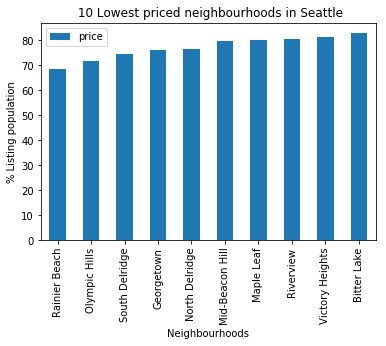

In [37]:
###10 least expensive neighbourhoods
bottom10_n = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values("price",ascending=True).head(10)
bottom10_n.plot(kind="bar")
plt.ylabel('% Listing population')
plt.xlabel('Neighbourhoods')
plt.title(" 10 Lowest priced neighbourhoods in Seattle");

6. What review ratings affect the customer or price?

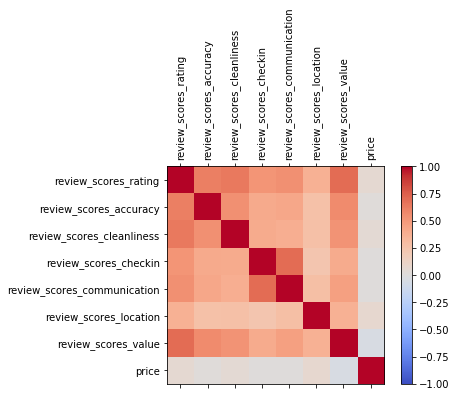

In [38]:
def correlation_matrix(df_reviews):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    """
    Plotting a confusion matrix for each pair of columns in the created dataframe- df_reviews(plot 1) & df_amenities(plot 2)
    
    input:  
    df: created Pandas dataframe>> df_reviews for Plot 1 and df_amenities for Plot 2
     
    output: 
    matrix that shows the correlation between the variables in each dataframe. blue to grey to red>> shows low to high correlation
    A dark red line runs from top left to bottom right- shows the correlation of the variable with itself.
    """



    corr=df_reviews.corr()
    fig=plt.figure()
    ax=fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df_reviews.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df_reviews.columns)
    ax.set_yticklabels(df_reviews.columns)
    plt.show()
##creating a confusion matrix for review ratings
correlation_matrix(df_reviews)

Observation:
Ratings: Cleanliness has the highest correlation with over all ratings, thus cleanliness is rather important for a good rating. Along with that, good interaction (or communication) with the customer is highly correlated with the check in rating.

Ratings and price: Ratings have little impact on the price charged by the host. Review ratings and location does have a low positive correlation with price (approx. 5% and 7%).

7. Does availability of certain amenities fetch a higher price?

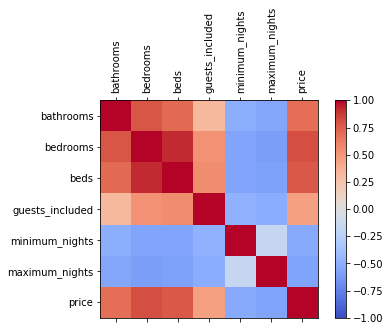

In [39]:
###create a confusion matrix for amenities
correlation_matrix(corr_amen)

Observation:
Amenities and Price: Beds, bedrooms and bathrooms offered by the host tend to affect price positively. Minimum and maximum nights offered do not affect price as such.